# SLAM Unit A - Part 2
In this part of Unit A, we will work on the motion model.

In [1]:
# You can modify the following to adjust the (width, height) of the plots (supposed to be in inches).
from pylab import *
plt.rcParams['figure.figsize'] = (12, 6)
# YouTube = True  # Uncomment to get YouTube videos instead of TIB AV.

## The motion model
The motion model lets us convert the left and right motor movements into a progression of poses (positions and orientations) of the robot.

In [2]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/HPeBhArNpzY" if "YouTube" in globals() else "//av.tib.eu/player/49051",
       width=560, height=315)

### After viewing the video, it is easy to answer the following question (1 point).
In our motion model, we guarantee that the heading angle $\theta$ is always in the range:
- A: from $0$ to $\pi$
- B: from $-\pi$ to $\pi$
- C: from $0$ to $2 \pi$.

In [3]:
# Enter your selection as a string, i.e., "A", "B", or "C". Then delete any lines below.
the_theta_range = "C"
# YOUR CODE HERE
#raise NotImplementedError()

In [4]:
# Let us test this.
assert(the_theta_range in "ABC")  # Needs to be one of the proposed solutions.

In [5]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/7zpz7f73MOU" if "YouTube" in globals() else "//av.tib.eu/player/49052",
       width=560, height=315)

### Your first programming assignment: implement the motion model (20 points).
Carefully watch the video above and implement the shown equations as Python3 code. Insert them into the indicated sections below.
After you run this, a list of poses should be output in the cell, followed by a plot of the positions.

(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(24.779, 0.0, 0.0)
(69.102, 0.0, 0.0)
(113.94845953817779, -0.052171404797263676, 6.280858640512919)
(158.9693376803923, -0.15692017028978156, 6.280858640512919)
(158.9693376803923, -0.15692017028978156, 6.280858640512919)
(203.6412167672408, -0.26085692984824893, 6.280858640512919)
(248.48767630541857, -0.31302833464724245, 0.0)
(293.33413584359636, -0.3651997394445061, 6.280858640512919)
(338.18059538177414, -0.4173711442417698, 0.0)
(338.18059538177414, -0.4173711442417698, 0.0)
(383.0270549199519, -0.4695425490390335, 6.280858640512919)
(427.8735144581297, -0.5217139538362972, 0.0)
(427.8735144581297, -0.5217139538362972, 0.0)
(472.7199739963075, -0.5738853586335608, 6.280858640512919)
(517.5664335344852, -0.6260567634308245, 0.0)
(562.412893072663, -0.6782281682280882, 6.28085

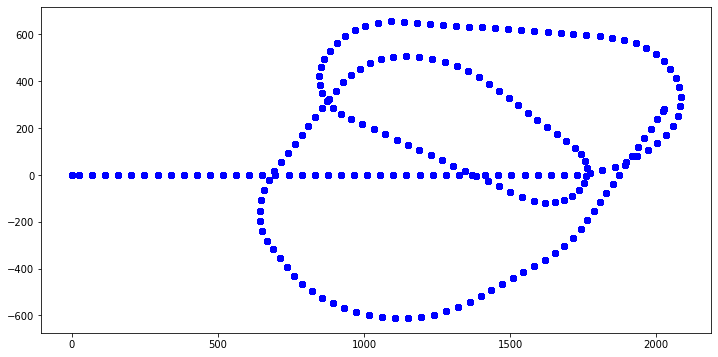

In [6]:
# Implement the first move model for the Lego robot.
# 02_a_filter_motor
from math import sin, cos, pi
from pylab import *
from lego_robot import *

# This function takes the old (x, y, heading) pose and the motor ticks
# (ticks_left, ticks_right) and returns the new (x, y, heading).
def filter_step(old_pose, motor_ticks, ticks_to_mm, robot_width):

    # Find out if there is a turn at all.
    if motor_ticks[0] == motor_ticks[1]:
        # No turn. Just drive straight.
        # YOUR CODE HERE
        
        new_x=old_pose[0]+motor_ticks[0]*ticks_to_mm*cos(old_pose[2]%(2*pi))
        new_y=old_pose[1]+motor_ticks[1]*ticks_to_mm*sin(old_pose[2]%(2*pi))
        new_theta=old_pose[2]%(2*pi)
        
        
        #raise NotImplementedError()
        return (new_x, new_y, new_theta)

    else:
        # vehicle parameter
        l=motor_ticks[0]*ticks_to_mm
        r=motor_ticks[1]*ticks_to_mm
        alpha=(r-l)/robot_width
        R=l/alpha
        
        # position generation
        # centre position
        cx=old_pose[0]-(R+robot_width/2)*sin(old_pose[2]%(2*pi))
        cy=old_pose[1]-(R+robot_width/2)*(-cos(old_pose[2]%(2*pi)))
        # new heading angle
        new_theta=(old_pose[2]+alpha)%(2*pi)
        # new position
        new_x=cx+(R+robot_width/2)*sin(new_theta)
        new_y=cy+(R+robot_width/2)*(-cos(new_theta))
        
       
        # Turn. Compute alpha, R, etc.
        # YOUR CODE HERE
       # raise NotImplementedError()
        return (new_x, new_y, new_theta)

if __name__ == '__main__':
    # Empirically derived conversion from ticks to mm.
    ticks_to_mm = 0.349

    # Measured width of the robot (wheel gauge), in mm.
    robot_width = 150.0

    # Read data.
    logfile = LegoLogfile()
    logfile.read("robot4_motors.txt")

    # Start at origin (0,0), looking along x axis (alpha = 0).
    pose = (0.0, 0.0, 0.0)

    # Loop over all motor tick records generate filtered position list.
    filtered = []
    for ticks in logfile.motor_ticks:
        pose = filter_step(pose, ticks, ticks_to_mm, robot_width)
        filtered.append(pose)

    # Draw result.
    for pose in filtered:
        print(pose)
        plot([p[0] for p in filtered], [p[1] for p in filtered], 'bo')
    show()

In [7]:
# Let us test two simple cases.
from math import isclose, sqrt

def public_test(the_filter_step):
    # Check what happens if we go straight.
    # Say the robot sits at (10,12), looks to the upper right
    # (45 degrees = pi/4), then runs for 5 ticks where each tick corresponds
    # to two millimetres.
    # The width should play no role in this case, so we set it to 1.
    # Then, the robot should keep its heading, and should move straight by a
    # distance of 10 * sqrt(1/2).
    new_x, new_y, new_theta = the_filter_step((10, 12, pi/4.0), (5,5), 2, 1)
    if new_x != 10 + 10.0 * sqrt(0.5) or \
       new_y != 12 + 10.0 * sqrt(0.5) or \
       new_theta != pi/4.0:
        print("The test case for going straight went wrong.")
        return False

    # Check a simple arc.
    # Say the robot turns, with a radius of 10, by pi/4.
    # Say it has a width of 2, so the left wheel travels 9/4 pi, and the right wheel 11/4 pi.
    # To make it easier, we put it at (10,0) in the beginning, looking upward.
    # Then, after the move, it should be at x = y = 10 * sqrt(1/2), and
    # look towards the upper left (at 135 degrees heading).
    new_x, new_y, new_theta = the_filter_step(
        (10, 0, pi/2.0), (9, 11), pi/4.0, 2)
    if not isclose(new_x, 10.0 * sqrt(0.5)) or \
       not isclose(new_y, 10.0 * sqrt(0.5)) or \
       not isclose(new_theta, 3*pi/4.0):
        print("The test case for a turn went wrong.")
        return False

    return True

assert(public_test(filter_step))

## Modifying the motion model and generating file output

In [8]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/wNmCSF0Pk4w" if "YouTube" in globals() else "//av.tib.eu/player/49053",
       width=560, height=315)

### Your second programming assignment: modify the motion model (5 points):
Carefully watch the video above and implement the shown equations as Python3 code. Insert them into the indicated sections below.

In [9]:
# Implement the second move model for the Lego robot.
# The difference to the first implementation is:
# - added a scanner displacement
# - added a different start pose (measured in the real world)
# - result is now output to a file, as "F" ("filtered") records.
#
# 02_b_filter_motor_file
from math import sin, cos, pi
from lego_robot import *

# This function takes the old (x, y, heading) pose and the motor ticks
# (ticks_left, ticks_right) and returns the new (x, y, heading).
def filter_step(old_pose, motor_ticks, ticks_to_mm, robot_width,
                scanner_displacement):

    # Find out if there is a turn at all.
    if motor_ticks[0] == motor_ticks[1]:
        # No turn. Just drive straight.
        # --->>> Use your previous implementation.
        # Think about how you need to modify your old code due to the
        # scanner displacement?
        # YOUR CODE HERE
        new_x=old_pose[0]+motor_ticks[0]*ticks_to_mm*cos(old_pose[2]%(2*pi))
        new_y=old_pose[1]+motor_ticks[1]*ticks_to_mm*sin(old_pose[2]%(2*pi))
        new_theta=old_pose[2]%(2*pi)
        
        
        #raise NotImplementedError()
        return (new_x, new_y, new_theta)

    else:
        # Turn. Compute alpha, R, etc.
        # --->>> Modify your previous implementation.
        # First modify the the old pose to get the center (because the
        #   old pose is the LiDAR's pose, not the robot's center pose).
        # Second, execute your old code, which implements the motion model
        #   for the center of the robot.
        # Third, modify the result to get back the LiDAR pose from
        #   your computed center. This is the value you have to return.
        old_x=old_pose[0]-cos(old_pose[2])*scanner_displacement
        old_y=old_pose[1]-sin(old_pose[2])*scanner_displacement
        
        l=motor_ticks[0]*ticks_to_mm
        r=motor_ticks[1]*ticks_to_mm
        alpha=(r-l)/robot_width
        R=l/alpha
        
        # position generation
        # centre position
        cx=old_x-(R+robot_width/2)*sin(old_pose[2]%(2*pi))
        cy=old_y-(R+robot_width/2)*(-cos(old_pose[2]%(2*pi)))
        # new heading angle
        new_theta=(old_pose[2]+alpha)%(2*pi)
        # new position
        new_x=cx+(R+robot_width/2)*sin(new_theta%(2*pi))
        new_y=cy+(R+robot_width/2)*(-cos(new_theta%(2*pi)))
        
        new_x=new_x+cos(new_theta)*scanner_displacement
        new_y=new_y+sin(new_theta)*scanner_displacement
        # YOUR CODE HERE
        #raise NotImplementedError()
        return (new_x, new_y, new_theta)

if __name__ == '__main__':
    # Empirically derived distance between scanner and assumed
    # center of robot.
    scanner_displacement = 30.0

    # Empirically derived conversion from ticks to mm.
    ticks_to_mm = 0.349

    # Measured width of the robot (wheel gauge), in mm.
    robot_width = 150.0

    # Measured start position.
    pose = (1850.0, 1897.0, 213.0 / 180.0 * pi)

    # Read data.
    logfile = LegoLogfile()
    logfile.read("robot4_motors.txt")

    # Loop over all motor tick records generate filtered position list.
    filtered = []
    for ticks in logfile.motor_ticks:
        pose = filter_step(pose, ticks, ticks_to_mm, robot_width,
                           scanner_displacement)
        filtered.append(pose)

    # Write all filtered positions to file.
    f = open("poses_from_ticks.txt", "w")
    for pose in filtered:
        print("F %f %f %f" % pose, file=f)
    f.close()

### Use the logfile viewer to evaluate your result: introducing the notebook version of the viewer.
- In the previous video, the logfile_viewer.py was presented, which you can use on your computer to look at the generated result file, "poses_from_ticks.txt". The logfile_viewer.py is a stand-alone Python program.
- To make things easier, there is a ipy_logfile_viewer, which can be run interactively, in this notebook. It has a quite similar visualization and interface.
- To use it, just run the following cell.
- Note that, in contrast to the logfile_viewer shown in the video, there is no file selector in the notebook version (ipy_logfile_viewer). Just enter the names of all the files you want to view using the "files" parameter.
- Note also that the graphics will be updated only after you release the slider. Alternatively, use the **cursor-left** and **cursor-right** keys on your keyboard. Also see the comments in the cell below.

In [10]:
# To run the logfile viewer, we import it and instantiate it, specifying all files we want to view.
import ipy_logfile_viewer as lfv
v = lfv.IPYLogfileViewer(files=["poses_from_ticks.txt", "robot4_motors.txt"], continuous_update=True)
# You may also try out the following options (by adding them to the list of arguments):
#- continuous_update=True (the graphics are updated while the slider moves, default: False)
# - matplotlib_format="png" (default: "svg"). Vector graphics such as "svg" allow you to zoom into the graphics
#   (e.g. using the zoom button in the browser) without a loss in quality. Alternatively, you can also use
#   pixel graphics, e.g. "png", or "jpg". Example:
#     v = lfv.IPYLogfileViewer(files=["poses_from_ticks.txt"], continuous_update=True, matplotlib_format="png")
# You may also add a list of files to load after the instantiation. Example:
     #v.load(["robot4_reference.txt"])
     #v.load(["robot_arena_landmarks.txt"]).
       

### Still missing: the test.

In [11]:
# Let us use the same two cases as above.
from math import isclose, sqrt

def public_test(the_filter_step):
    # Check what happens if we go straight.
    # Say the robot sits at (10,12), looks to the upper right
    # (45 degrees = pi/4), then runs for 5 ticks where each tick corresponds
    # to two millimetres.
    # The width should play no role in this case, so we set it to 1.
    # Then, the robot should keep its heading, and should move straight by a
    # distance of 10 * sqrt(1/2).
    # If we drive straight, there should be no difference, so we can re-use
    # our previous test.
    new_x, new_y, new_theta = the_filter_step(
        (10, 12, pi/4.0), (5,5), 2, 1, 3.0)
    if new_x != 10 + 10.0 * sqrt(0.5) or \
       new_y != 12 + 10.0 * sqrt(0.5) or \
       new_theta != pi/4.0:
        print("The test case for going straight went wrong.")
        return False

    # Check a simple arc.
    # Say the robot turns, with a radius of 10, by pi/4.
    # Say it has a width of 2, so the left wheel travels 9/4 pi, and the
    # right wheel 11/4 pi. To make it easier, we put it at (10,0) in the
    # beginning, looking upward. If we assume a displacement of 3, this means
    # the scanner is at (10,3) instead.
    # After the move, the body should be at x = y = 10 * sqrt(1/2), and
    # look towards the upper left (at 135 degrees heading). Then, due to this
    # heading, the scanner would be at the body plus the unit vector pointing
    # towards the upper left, (-sqrt(0.5), +sqrt(0.5)), times the displacement,
    # which is 3.
    new_x, new_y, new_theta = the_filter_step(
        (10, 0+3, pi/2.0), (9, 11), pi/4.0, 2, 3.0)
    if not isclose(new_x, (10.0 - 3) * sqrt(0.5)) or \
       not isclose(new_y, (10.0 + 3) * sqrt(0.5)) or \
       not isclose(new_theta, 3*pi/4.0):
        print("The test case for a turn went wrong.")
        return False

    return True

assert(public_test(filter_step))